# GDP vs Life Satisfaction Regression Model

Examples from [Chapter 01 (ML and DP in python)](https://github.com/ageron/handson-ml/blob/master/01_the_machine_learning_landscape.ipynb)

In [22]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import sklearn.linear_model


np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [11]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [12]:
datapath = os.path.join("datasets", "lifesat", "")

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.xls",
                             thousands=',',
                             delimiter='\t',
                             encoding='latin1', 
                             na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

In [13]:
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Mexico,9009.280,6.6
Russia,9054.914,6.0
Turkey,9437.372,5.5
Hungary,12239.894,5.3
Chile,13340.905,6.7


Cyprus - GPD per capita: 22587.49, Predicted life satisfaction: 6.184457826248521


/Users/thdaraujo/.asdf/installs/python/3.6.4/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


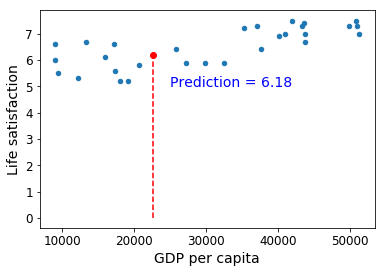

In [14]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
cyprus_predicted_life_satisfaction = model.predict(cyprus_gdp_per_capita)[0][0]

print("Cyprus - GPD per capita: {0}, Predicted life satisfaction: {1}".format(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction))

plt.text(25000, 5.0, r"Prediction = {0:.2f}".format(cyprus_predicted_life_satisfaction), fontsize=14, color="b")
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")

plt.show()

In [15]:
t0, t1 = model.intercept_[0], model.coef_[0][0]
t0, t1

(5.295521405997438, 3.935525462329292e-05)

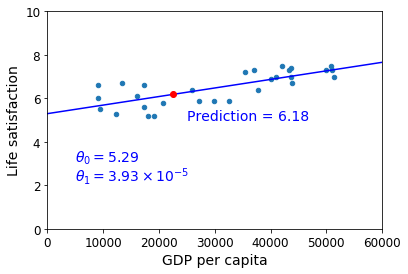

In [16]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 5.29$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 3.93 \times 10^{-5}$", fontsize=14, color="b")

plt.text(25000, 5.0, r"Prediction = {0:.2f}".format(cyprus_predicted_life_satisfaction), fontsize=14, color="b")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")

plt.show()

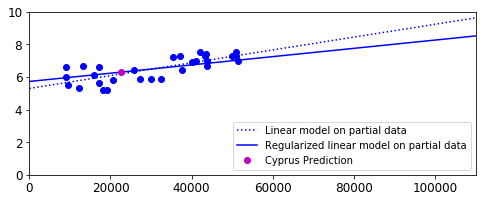

In [37]:
plt.figure(figsize=(8,3))

plt.plot(list(country_stats["GDP per capita"]), list(country_stats["Life satisfaction"]), "bo")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")

ridge = sklearn.linear_model.Ridge(alpha=10**9.5)

Xsample = np.c_[country_stats["GDP per capita"]]
ysample = np.c_[country_stats["Life satisfaction"]]
ridge.fit(Xsample, ysample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b", label="Regularized linear model on partial data")

ridge_pred = ridge.predict(cyprus_gdp_per_capita)[0][0]
plt.plot(cyprus_gdp_per_capita, ridge_pred, "mo", label="Cyprus Prediction")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])

plt.show()

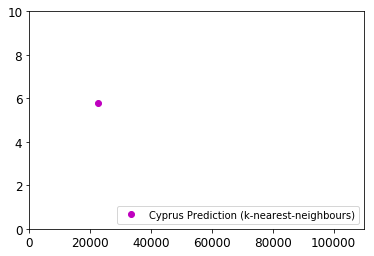

In [85]:
# kne
X = Xsample
Y = ysample

knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
knn.fit(X, Y)

knn_pred = knn.predict(cyprus_gdp_per_capita)[0][0]
plt.plot(cyprus_gdp_per_capita, knn_pred, "mo", label="Cyprus Prediction (k-nearest-neighbours)")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])

plt.show()

In [ ]:
x_min, x_max = 0, X.max() + .5
y_min, y_max = 0, Y.max() + .5